In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

### DATA WRANGLING ###

#Se analizarán ambos set de datos
#Credits
credits.head()


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
#Movies
movies.head()

#Dada la información que entrega movies y el enfoque que se quiere desarrollar, sólo nos enfocaremos en el dataframe de movies.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
#De todas maneras, se revisará cómo se compone el df movies
movies.shape

#se puede ver que es de 20 columnas y 4803 registros por cada una de ellas.

(4803, 20)

In [5]:
#Veremos más información de esta, de modo de no sólo quedarnos con la información del "head"
movies.info()

#Se puede ver que en su mayoría, todos tienen 4803 registros, tal como indica el parámetro "shape". Sin embargo, podemos ver
#que otras variables como "homepage","release_date", "runtime" y "tagline" poseen menos registros, para lo cual debería
#hacerse un trabajo más profundo para investigar a qué se debe ese problema y cómo poder solucionarlo.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [6]:
#Afortunadamente, a excepción de "release_date", las variables se encuentran fuera del alcance de investigación de este trabajo
#Es por esto que se seleccionarán las variables: budget, genres, id, release_date, revenue y title, para enfocar y disminuir
#A sólo lo necesario nuestro dataframe
columns = ['id', 'title', 'release_date','budget', 'revenue', 'genres']

movies2 = movies[columns]
movies2.head()


,id,title,release_date,budget,revenue,genres
0,19995,Avatar,2009-12-10,237000000,2787965087,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,961000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,206647,Spectre,2015-10-26,245000000,880674609,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,49026,The Dark Knight Rises,2012-07-16,250000000,1084939099,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,49529,John Carter,2012-03-07,260000000,284139100,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [7]:
#Ya teniendo el dataframe definitivo, se puede continuar a indagar sobre qué clase de variables son las que componen este. 
#Se realiza nuevamente un "info", pero con el dataframe

movies2.info()

#Esto nos entregará que tenemos 6 variables, 3 de ellas de tipo int64 (id, budget y revenue) y 3 de tipo object (title, 
#release_date y genres)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
id              4803 non-null int64
title           4803 non-null object
release_date    4802 non-null object
budget          4803 non-null int64
revenue         4803 non-null int64
genres          4803 non-null object
dtypes: int64(3), object(3)
memory usage: 225.3+ KB


In [8]:
#Lo que corresponde hacer ahora, es descubrir qué tipo de object son las variables que tenemos. Dado que son pocas variables, 
#se verán todas
type(movies2['id'][0])

numpy.int64

In [9]:
type(movies2['title'][0])

str

In [10]:
type(movies2['release_date'][0])

str

In [11]:
type(movies2['budget'][0])

numpy.int64

In [12]:
type(movies2['revenue'][0])

numpy.int64

In [13]:
type(movies2['genres'][0])

str

In [14]:
#Con esto, comprobamos que todas las variables de tipo object son tipo string

#Lo que sigue, es identificar columnas y filas que se encuentren con missing values, tal como parece tener release_date.
#De todos modos, se verificará que las otras variables tampoco tengan variables missing "Escondidas"

# count null columns
null_col=movies2.columns[movies2.isnull().any()]
movies2[null_col].isnull().sum()

#El resultado de esto nos indica que sólo release_date tiene 1 dato como missing

release_date    1
dtype: int64

In [15]:
#Ya que sabemos que sólo hay 1 missing value en release_date, averiguaremos en qué fila se encuentra
print(movies2[movies2['release_date'].isnull()][null_col])

     release_date
4553          NaN


In [16]:
# Dado el ejercicio anterior, sabemos que el registro 4553 es quien tiene el missing value para release date, 
#por lo que veremos qué más contiene esta fila
print(movies2.iloc[4553, :])

id                                  380097
title           America Is Still the Place
release_date                           NaN
budget                                   0
revenue                                  0
genres                                  []
Name: 4553, dtype: object


In [17]:
#Vaya!, encontramos que esta película de nombre "AmericaIs Still the Place" tiene $0 de budget, 
#$0 de revenue y ningún género...raro, ¿no?

#Esto hace que me nazca la duda de cómo se comportarán las variables. Veremos unos estadísticos básicos para descifrarlos.

movies2.describe().round()

#Con esto, vemos que para ambas variables, el mínimo el $0, pero lo que llama más la atención, es que dentro de revenue hay 
#por lo menos un 25% de películas con $0 de revenue...debieron haber sido muy malas, ¿no? jajaja
#Por esto, investigaremos cuáles y cuántas son, tanto para budget y para revenue.


,id,budget,revenue
count,4803.0,4803.0,4.803000e+03
mean,57165.0,29045040.0,8.226064e+07
std,88695.0,40722391.0,1.628571e+08
min,5.0,0.0,0.000000e+00
25%,9014.0,790000.0,0.000000e+00
50%,14629.0,15000000.0,1.917000e+07
75%,58610.0,40000000.0,9.291719e+07
max,459488.0,380000000.0,2.787965e+09


In [18]:
#To select rows whose budget value equals to 0
miss_budget = movies2.budget == 0
# number of rows whose budget value equals to 0
print(miss_budget.sum())

#Hemos descubierto que son 1037 películas las que tienen budget igual a cero.

1037


In [19]:
#Hagamos lo mismo con revenue

#To select rows whose budget value equals to 0
rev = movies2.revenue == 0
# number of rows whose budget value equals to 0
print(rev.sum())

#Son 1427 películas las que marcan $0 de ganancias. PEro estas no las eliminaremos, ya que definitivamente tienen que haber
#sido muy malas...mejor enfoquémonos en eliminar aquellas que indican no tener budget.

##################################################################################
### NO SE HA ELIMINADO UN LA DATA CON BUDGET $0. Esto se hará en Data Cleaning ###
##################################################################################

1427


In [20]:
#Verifiquemos si es que existe data duplicada

# count of duplicated data
sum(movies2.duplicated())

#Super! no hay data duplicada...eso significa que podemos seguir con el siguiente paso: data cleaning

0

In [21]:
#### DATA CLEANING ####

In [22]:
# Lo primero que se hará es eliminar el missing value encontrado en la variable "release_date"
#Como ya se sabe que la fila que lo contiene es la 4553, solo aplicaremos drop en ella para hacerla desaparecer!

# drop row with missing release_date value
movies2.drop([4553], axis=0, inplace=True)

C:\Users\camil\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
#Nuevamente, veremos las estadísticas básicas de las variables numéricas que tenemos. 
# this returns useful descriptive statistics for each column of data
movies2.describe().round()

,id,budget,revenue
count,4802.0,4802.0,4.802000e+03
mean,57098.0,29051088.0,8.227777e+07
std,88581.0,40724474.0,1.628697e+08
min,5.0,0.0,0.000000e+00
25%,9014.0,800000.0,0.000000e+00
50%,14626.0,15000000.0,1.917498e+07
75%,58590.0,40000000.0,9.291920e+07
max,459488.0,380000000.0,2.787965e+09


In [24]:
#Tal como habíamos visto anteriormente, vams a tratar los datos que tienen $0 en budget y en revenue. Pero no los eliminaremos
#Sino que lo reemplazaremos por el promedio de cada variable.

# budget mean
budget_mean = round(movies2['budget'].mean())
print(budget_mean)

# revenue mean
revenue_mean = round(movies2['revenue'].mean())
print(revenue_mean)


29051088
82277769


In [25]:
# replace budget values of 0 with the budget mean by masking
movies2['budget'] = movies2.budget.mask(movies2.budget == 0,budget_mean)

# check to see if there are rows whose budget value equals a 0
movies2.loc[movies2['budget'] == 0]

# replace revenue values of 0 with the revenue mean by masking
movies2['revenue'] = movies2.revenue.mask(movies2.revenue == 0,revenue_mean)

# check to see if there are rows whose budget value equals a 0
movies2.loc[movies2['revenue'] == 0]

C:\Users\camil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\camil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,title,release_date,budget,revenue,genres


In [26]:
#Cambiaremos el tipo de release_date a datatime
# change to datetime datatype
movies2['release_date'] = pd.to_datetime(movies2['release_date'])

# cross check the datatype to ensure that the change was correctly implemented
type(movies2['release_date'][0])

C:\Users\camil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


pandas._libs.tslibs.timestamps.Timestamp

In [27]:
with open('movies3.csv', 'w', encoding='utf-8') as f:
    f.write('id;title;release_date;budget;revenue;genre\n')
    for i, row in enumerate(movies2['genres']):
        nl = '\n'
        try:
            genres = eval(row)
        except:
            genres = [{'name':row}]
        for o in genres:
            try:
                f.write(f"{movies2['id'][i]};{movies2['title'][i]};{movies2['release_date'][i].strftime('%Y-%m-%d')};{movies2['budget'][i]};{movies2['revenue'][i]};{o.get('name')}{nl}")
            except:
                pass
                        
                        #f.write(f"{movies2['id'][i]};{movies2['title'][i]};{movies2['release_date'][i].strftime('%Y-%m-%d')};{movies2['budget'][i]};{movies2['revenue'][i]};{o.get('name')}{nl}")

In [28]:
mov3 = pd.read_csv('movies3.csv', encoding='utf-8',delimiter=";")
mov3.head()


,id,title,release_date,budget,revenue,genre
0,19995,Avatar,2009-12-10,237000000,2787965087,Action
1,19995,Avatar,2009-12-10,237000000,2787965087,Adventure
2,19995,Avatar,2009-12-10,237000000,2787965087,Fantasy
3,19995,Avatar,2009-12-10,237000000,2787965087,Science Fiction
4,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,961000000,Adventure


In [29]:
mov3['id'] = mov3['id'].astype(int)

In [30]:
#Ya teniendo los géneros separados por filas, se puede continuar con el análisis a desarrollar:
#1. Ganancia por tipo de género
#Para obtener la ganancia, primero se debe construir el indicador "profit", el cual será de la siguiente manera:

mov3['profit'] = mov3['revenue']-mov3['budget']
mov3.head()

,id,title,release_date,budget,revenue,genre,profit
0,19995,Avatar,2009-12-10,237000000,2787965087,Action,2550965087
1,19995,Avatar,2009-12-10,237000000,2787965087,Adventure,2550965087
2,19995,Avatar,2009-12-10,237000000,2787965087,Fantasy,2550965087
3,19995,Avatar,2009-12-10,237000000,2787965087,Science Fiction,2550965087
4,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,961000000,Adventure,661000000


In [121]:
#Por otro lado, también se puede obtener el ratio de ganancia respecto a su budget, lo cual podría ser más representativo
#ya que nos indicaría cuántas veces se ganó lo "invertido"

profit_ratio = mov3['profit']/mov3['budget']
mov3['profit_ratio']  =profit_ratio
mov3.describe()

,id,budget,revenue,profit,profit_ratio
count,12157.000000,1.215700e+04,1.215700e+04,1.215700e+04,1.215700e+04
mean,51737.788270,3.944229e+07,1.177068e+08,7.826455e+07,1.066892e+05
std,83695.037431,4.127188e+07,1.711673e+08,1.453061e+08,2.758842e+06
min,5.000000,1.000000e+00,5.000000e+00,-1.657101e+08,-9.999997e-01
25%,8698.000000,1.400000e+07,2.970000e+07,5.654912e+06,3.286651e-01
50%,13569.000000,2.905109e+07,8.227777e+07,5.322668e+07,1.832175e+00
75%,49530.000000,5.000000e+07,1.074588e+08,7.827777e+07,3.226691e+00
max,459488.000000,3.800000e+08,2.787965e+09,2.550965e+09,8.227777e+07


In [122]:
#Luego de esto, podemos asociar cuánto se ganó por tipo de género, utilizando la variable "genre" y "profit_ratio"
#Pero antes, se analizará cuántos géneros existen y cuántos hay de cada ellos en el dataframe construído

mov3['genre'].value_counts()


Drama              2297
Comedy             1722
Thriller           1273
Action             1153
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             347
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: genre, dtype: int64

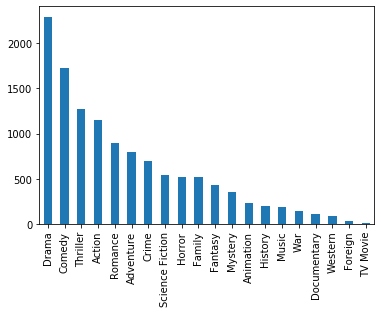

In [123]:
#Por otro lado, podemos tener otra vista de estos géneros, creando una gráfico de barras
mov3['genre'].value_counts().plot(kind="bar");

In [124]:
# Ahora se verá cuáles son las películas que tienen un mayor índice de profit promedio de manera descendente,
#Por lo que se puede ver que el top 3 de películas más "rentables" son el documental, horror y romance

profgen = mov3.groupby(['genre'], as_index=False)['profit_ratio'].mean().sort_values(by='profit_ratio', ascending=False)
profgen

,genre,profit_ratio
5,Documentary,381691.692215
11,Horror,332918.127641
14,Romance,207738.802927
8,Fantasy,196121.986166
3,Comedy,184808.441049
15,Science Fiction,153795.877738
6,Drama,127347.935827
1,Adventure,104153.069033
4,Crime,21392.625458
13,Mystery,18255.943191


In [125]:
profgen_m = mov3.groupby(['genre'], as_index=False)['profit_ratio'].median().sort_values(by='profit_ratio', ascending=False)
profgen_m

,genre,profit_ratio
16,TV Movie,10.211060
2,Animation,1.832175
3,Comedy,1.832175
5,Documentary,1.832175
6,Drama,1.832175
7,Family,1.832175
17,Thriller,1.832175
9,Foreign,1.832175
11,Horror,1.832175
12,Music,1.832175


In [126]:
#2#
# Ganancia por tipo de género a través del tiempo

#La misión aquí es evidenciar el profit que han tenido a través del tiempo todos los géneros
 
# Lo primero será hacer un dataframe por cada tipo de género

doc= mov3[mov3["genre"] == "Documentary"]
doc.head()

hor=mov3[mov3["genre"] == "Horror"]
hor.head()

rom=mov3[mov3["genre"] == "Romance"]
rom.head()

fan=mov3[mov3["genre"] == "Fantasy"]
fan.head()

com=mov3[mov3["genre"] == "Comedy"]
com.head()

sf=mov3[mov3["genre"] == "Science Fiction"]
sf.head()

drama=mov3[mov3["genre"] == "Drama"]
drama.head()

adv=mov3[mov3["genre"] == "Adventure"]
adv.head()

cri=mov3[mov3["genre"] == "Crime"]

act=mov3[mov3["genre"] == "Action"]

west=mov3[mov3["genre"] == "Western"]
west.head()

tvmov=mov3[mov3["genre"] == "TV Movie"]
tvmov.head()

thriller=mov3[mov3["genre"] == "Thriller"]
thriller.head()

mys=mov3[mov3["genre"] == "Mystery"]
mys.head()

fam=mov3[mov3["genre"] == "Family"]
fam.head()

mus=mov3[mov3["genre"] == "Music"]
mus.head()

foreign=mov3[mov3["genre"] == "Foreign"]
foreign.head()

animation=mov3[mov3["genre"] == "Animation"]
animation.head()

war=mov3[mov3["genre"] == "War"]
war.head()

hist=mov3[mov3["genre"] == "History"]
hist.head()

,id,title,release_date,budget,revenue,genre,profit,profit_ratio
366,676,Pearl Harbor,2001-05-21,140000000,449220945,History,309220945,2.208721
373,1966,Alexander,2004-11-21,155000000,167298192,History,12298192,0.079343
521,616,The Last Samurai,2003-12-05,140000000,456758981,History,316758981,2.262564
782,12100,Windtalkers,2002-06-14,115000000,77628265,History,-37371735,-0.324972
817,2024,The Patriot,2000-06-28,110000000,215294342,History,105294342,0.957221


C:\Users\camil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,title,release_date,budget,revenue,genre,profit,profit_ratio
11766,65203,The Broadway Melody,1929-02-08,379000,4358000,Horror,3979000,10.498681
6151,539,Psycho,1960-06-16,806948,32000000,Horror,31193052,38.655591
10863,12602,The Torture Chamber of Dr. Sadism,1967-10-05,29051088,82277769,Horror,53226681,1.832175
10255,805,Rosemary's Baby,1968-06-12,3200000,33395426,Horror,30195426,9.436071
9948,10331,Night of the Living Dead,1968-10-01,114000,30000000,Horror,29886000,262.157895


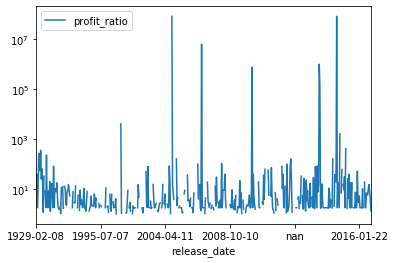

In [137]:
hor.sort_values(by="release_date", inplace=True)
hor.where(hor['profit_ratio']>1).plot(x ='release_date', y='profit_ratio', kind = 'line', logy=True);
hor.describe()
hor.head()

DatetimeIndex(['2009-12-10', '2007-05-19', '2015-10-26', '2012-07-16',
               '2012-03-07', '2007-05-01', '2010-11-24', '2015-04-22',
               '2009-07-07', '2016-03-23',
               ...
               '2007-01-01', '1997-11-06', '2004-04-11', '2012-01-20',
               '1995-09-09', '2004-10-08', '2005-03-12', '1992-09-04',
               '2011-12-26', '2012-05-03'],
              dtype='datetime64[ns]', name='release_date', length=4774, freq=None)


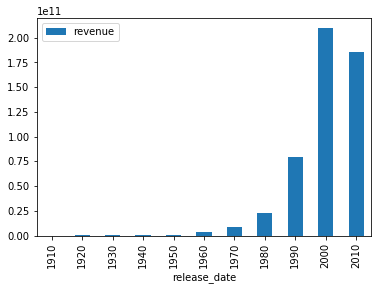

In [165]:
#mov3['release_date'] = pd.to_datetime(mov3['release_date'])
#mov3.set_index('release_date', inplace=True)
print(mov3.index)
mov3.drop_duplicates(subset='id').groupby((mov3.index.year//10)*10).sum().plot(y='revenue', kind = 'bar')



                    Action     Adventure       Fantasy     Animation  \
release_date                                                           
1910          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1920          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1930          1.073600e+07  1.160327e+08  1.849255e+08  0.000000e+00   
1940          9.007777e+07  9.172000e+06  0.000000e+00  4.350672e+08   
1950          4.427184e+07  4.360000e+07  0.000000e+00  1.000000e+06   
1960          3.485836e+08  5.612297e+08  0.000000e+00  0.000000e+00   
1970          1.058673e+09  1.716109e+09  0.000000e+00  0.000000e+00   
1980          3.791173e+09  5.489663e+09  1.144298e+09  1.667386e+08   
1990          1.639205e+10  9.995263e+09  3.400461e+09  2.898037e+09   
2000          3.373109e+10  3.728530e+10  8.074551e+09  1.234243e+10   
2010          4.873605e+10  2.008848e+10  6.107031e+09  1.570477e+10   

              Science Fiction         Drama      Thriller      

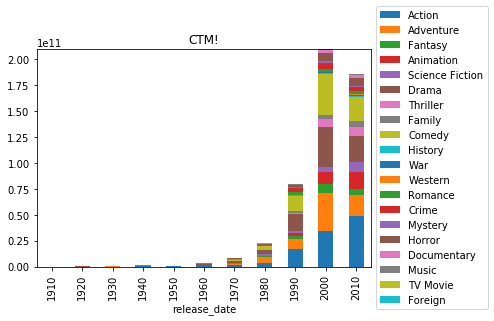

In [209]:
output = {}
for genre in mov3['genre'].unique():
    grouped_by_decade = mov3.where(mov3['genre']==genre).groupby((mov3.index.year//10)*10).sum()
    output[genre] = grouped_by_decade['revenue']
    

#pd.DataFrame(data=output).plot( kind = 'bar', stacked=True)
print(pd.DataFrame(data=output))

f = plt.figure()

plt.title('Profit by decade and genre proportion', color='black')
pd.DataFrame(data=output).plot(kind='bar',  stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [39]:
#The next step of our data cleaning is improving the data structure where we shall convert json dictionaries 
#into string for the columns we are mostly interested in i.e.: genres,

# changing genres column to string
#movies2['genres'] = movies2['genres'].apply(json.loads)
#for index, i in zip(movies2.index,movies2['genres']):
#    genres_list = []
#    for j in range(len(i)):
#        genres_list.append((i[j]['name']))
#    movies2.loc[index,'genres']=str(genres_list)


In [40]:
#Verificamos el cambio realizado
movies2.head()


,id,title,release_date,budget,revenue,genres
0,19995,Avatar,2009-12-10,237000000,2787965087,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,961000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,206647,Spectre,2015-10-26,245000000,880674609,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,49026,The Dark Knight Rises,2012-07-16,250000000,1084939099,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,49529,John Carter,2012-03-07,260000000,284139100,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [41]:
for row in movies2['genres']:
    print([o.get('name') for o in eval(row)])

['Action', 'Adventure', 'Fantasy', 'Science Fiction']
['Adventure', 'Fantasy', 'Action']
['Action', 'Adventure', 'Crime']
['Action', 'Crime', 'Drama', 'Thriller']
['Action', 'Adventure', 'Science Fiction']
['Fantasy', 'Action', 'Adventure']
['Animation', 'Family']
['Action', 'Adventure', 'Science Fiction']
['Adventure', 'Fantasy', 'Family']
['Action', 'Adventure', 'Fantasy']
['Adventure', 'Fantasy', 'Action', 'Science Fiction']
['Adventure', 'Action', 'Thriller', 'Crime']
['Adventure', 'Fantasy', 'Action']
['Action', 'Adventure', 'Western']
['Action', 'Adventure', 'Fantasy', 'Science Fiction']
['Adventure', 'Family', 'Fantasy']
['Science Fiction', 'Action', 'Adventure']
['Adventure', 'Action', 'Fantasy']
['Action', 'Comedy', 'Science Fiction']
['Action', 'Adventure', 'Fantasy']
['Action', 'Adventure', 'Fantasy']
['Action', 'Adventure']
['Adventure', 'Fantasy']
['Adventure', 'Fantasy']
['Adventure', 'Drama', 'Action']
['Drama', 'Romance', 'Thriller']
['Adventure', 'Action', 'Science Fic

['Adventure', 'Comedy', 'Family', 'Science Fiction']
['Comedy', 'Drama', 'Family']
['Horror', 'Action', 'Science Fiction']
['Comedy']
['Adventure', 'Comedy', 'Drama']
['Action', 'Adventure', 'Crime', 'Thriller']
['Adventure', 'Family', 'Fantasy']
['Crime', 'Drama', 'Thriller']
['Action', 'Adventure', 'Crime', 'Thriller']
['Adventure', 'Action', 'Comedy']
['Fantasy', 'Adventure', 'Animation', 'Comedy', 'Family']
['Action', 'Science Fiction', 'Adventure']
['Adventure', 'Drama', 'Music', 'Romance']
['Drama', 'Romance']
['Action', 'Adventure', 'Crime', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Crime', 'Drama', 'Thriller']
['Comedy', 'Fantasy', 'Science Fiction']
['Adventure', 'Comedy', 'Family', 'Fantasy', 'Science Fiction']
['Crime', 'Drama', 'Mystery', 'Thriller']
['Comedy', 'Music']
['Adventure', 'Action']
['Drama', 'Romance', 'Western']
['History', 'Drama']
['Thriller', 'Mystery']
['Adventure', 'Action', 'Horror', 'Science Fiction']
['D

['Comedy', 'Drama', 'Family']
['Drama']
['Adventure', 'Drama']
['Comedy', 'Drama', 'Romance']
['Thriller', 'Horror', 'Mystery']
['Horror', 'Action', 'Thriller', 'Crime']
['Animation', 'Family']
['Comedy', 'Drama', 'Romance']
['Action', 'Comedy', 'Crime', 'Fantasy']
['Adventure', 'Comedy', 'Family']
['Drama']
['Drama', 'Crime', 'Thriller']
['Action', 'Drama', 'Thriller']
['Comedy', 'Romance']
['Drama', 'Comedy', 'Romance', 'Family']
['Documentary']
['Drama', 'History']
['Crime', 'Drama', 'Mystery']
['Action', 'Comedy']
['Action', 'Crime', 'Drama', 'Thriller']
['Comedy', 'Thriller', 'Crime', 'Action']
['Comedy', 'Romance']
['Action', 'Thriller', 'Science Fiction']
['Comedy']
['Action', 'Thriller', 'Crime']
['Action', 'Comedy', 'Thriller']
['Drama']
['Drama', 'Action', 'Thriller', 'Romance']
['Comedy', 'Drama']
['Action', 'Adventure', 'Drama', 'Thriller']
['Comedy', 'Fantasy', 'Romance']
['Action', 'Adventure', 'Drama', 'Thriller']
['Drama', 'Horror', 'Mystery']
['Adventure', 'Action', 'C

['Comedy', 'Drama', 'Romance']
['Action', 'Comedy', 'Thriller']
['Crime', 'Comedy', 'Drama']
['Animation', 'Adventure', 'Family']
['Action', 'Adventure', 'Drama', 'History', 'War']
['Drama', 'Family']
['Drama', 'Horror', 'Thriller']
['Horror', 'Thriller', 'Adventure']
['Comedy', 'Romance']
['Animation', 'Comedy', 'Drama', 'Family']
['Action', 'Adventure', 'Comedy']
['Comedy', 'Romance']
['Comedy', 'Drama']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Comedy', 'Mystery']
['Thriller', 'Science Fiction']
['Crime', 'Drama', 'Romance', 'Thriller']
['Action', 'Thriller', 'War']
['Music', 'Drama', 'Romance', 'Crime']
['Animation', 'Comedy']
['Comedy', 'Crime', 'Romance']
['Comedy', 'Adventure']
['Science Fiction', 'Drama', 'Thriller']
['Music', 'Drama', 'Romance']
['Family', 'Fantasy', 'Science Fiction', 'Adventure', 'Comedy']
['Action', 'Adventure', 'Comedy', 'Drama', 'Family', 'Music', 'Romance']
['Comedy', 'Crime']
['Drama', 'History', 'War']
['Horror', 'Thriller']
['Horror', '

['Comedy', 'Drama']
['Action', 'Crime', 'Drama', 'Thriller']
['Comedy']
['Action', 'Adventure', 'Comedy', 'Crime']
['Drama', 'Romance']
['Comedy']
['Drama', 'Music']
['Drama', 'Thriller', 'Crime', 'Foreign']
['Drama', 'Romance', 'Science Fiction', 'Thriller']
['Comedy']
['Drama']
['Drama', 'Action', 'Crime']
['Family', 'Comedy', 'Romance']
['Animation', 'Drama']
['Thriller', 'Adventure', 'Fantasy']
['Drama', 'Thriller']
['Thriller', 'Horror']
['Thriller', 'Crime', 'Drama', 'Action']
['Horror', 'Thriller']
['Comedy', 'Drama', 'Romance']
['Action']
['Adventure', 'Action', 'Thriller']
['Drama', 'Crime']
['Drama', 'Music', 'Romance']
['Comedy', 'Drama', 'Romance']
['Drama', 'Romance']
['Drama', 'Comedy']
['Thriller', 'Horror']
['Adventure', 'Action', 'Thriller']
['Comedy', 'Drama', 'Family']
['Comedy', 'Romance']
['Comedy']
['Drama', 'History']
['Crime', 'Drama']
['Thriller', 'Action', 'Crime']
['Adventure', 'Action', 'Romance', 'Science Fiction']
['Adventure', 'Action', 'Thriller']
['Acti

['Comedy', 'Drama']
['Documentary']
['Drama', 'Music', 'Romance']
['Crime', 'Drama']
['Crime', 'Drama', 'Thriller', 'Action']
['Crime', 'Drama', 'Thriller']
['Comedy', 'Drama', 'Romance']
['Horror']
['Romance', 'Drama', 'Comedy']
['Drama', 'Animation', 'War']
[]
['Documentary']
['Drama', 'Romance']
['Documentary']
['Drama', 'Western']
['History', 'Documentary']
['Drama', 'Action', 'Thriller']
['Comedy', 'Drama']
['Comedy']
['Action', 'Thriller']
['Comedy', 'Drama']
['Comedy', 'Horror']
['Action', 'Adventure', 'Science Fiction']
[]
['Drama', 'Comedy', 'Music']
['Comedy']
['Comedy', 'Drama', 'Romance']
['Drama']
['Animation', 'Family', 'Foreign']
['Drama', 'Action', 'Thriller']
['Adventure', 'Family']
['Comedy', 'Drama', 'Music', 'Romance']
['Comedy', 'Drama', 'Mystery', 'Thriller']
['Comedy', 'Science Fiction', 'Romance', 'Horror']
['Drama', 'Action', 'Romance']
['Drama']
['Horror', 'Science Fiction']
['Horror', 'Thriller']
['Thriller']
['Horror', 'Comedy']
['Drama', 'Action', 'Crime', 

[]
['Drama', 'Comedy']
['Comedy']
['Drama', 'Romance']
['Drama']
['Comedy']
['Drama']
['Horror', 'Thriller']
['Drama', 'Fantasy', 'Horror', 'Science Fiction']
['Comedy']
['Comedy', 'Drama']
['Action', 'Drama']
['Comedy', 'Horror', 'Science Fiction']
['Family']
['Drama', 'Comedy', 'Crime']
['Documentary']
['Thriller']
['Crime', 'Mystery', 'Thriller']
['Thriller', 'Action', 'Drama', 'Science Fiction']
['Crime', 'Horror']
['Documentary', 'Music']
['Documentary']
['Mystery', 'Drama', 'Thriller']
['Comedy', 'Romance']
['Romance', 'Comedy']
['Science Fiction']
['Documentary', 'Comedy', 'Drama']
['Comedy']
['Comedy', 'Drama']
['Horror', 'Science Fiction']
['Drama']
['Drama', 'Comedy']
['Mystery', 'Horror', 'Thriller']
['Comedy', 'Drama', 'Romance']
['Drama']
['Drama', 'Romance']
['Romance', 'Comedy', 'Drama']
['Thriller', 'Horror']
['Drama', 'Comedy', 'Family']
['Documentary']
['Horror', 'Thriller', 'Fantasy']
['Documentary']
['Thriller', 'Science Fiction']
['Documentary']
['Drama']
['Comedy'

In [42]:
mov_gen=movies2['genres'].to_string()
mov_gen.split(' , ')

['0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...\n1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...\n2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...\n3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...\n4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...\n5       [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...\n6       [{"id": 16, "name": "Animation"}, {"id": 10751...\n7       [{"id": 28, "name": "Action"}, {"id": 12, "nam...\n8       [{"id": 12, "name": "Adventure"}, {"id": 14, "...\n9       [{"id": 28, "name": "Action"}, {"id": 12, "nam...\n10      [{"id": 12, "name": "Adventure"}, {"id": 14, "...\n11      [{"id": 12, "name": "Adventure"}, {"id": 28, "...\n12      [{"id": 12, "name": "Adventure"}, {"id": 14, "...\n13      [{"id": 28, "name": "Action"}, {"id": 12, "nam...\n14      [{"id": 28, "name": "Action"}, {"id": 12, "nam...\n15      [{"id": 12, "name": "Adventure"}, {"id": 10751...\n16      [{"id": 878, "name": "Science Fiction"}, {"id"

In [43]:
type(mov_gen['genres'])

TypeError: string indices must be integers

In [ ]:
mov_gen['genres'].to_string()
mov_gen.head()

In [ ]:
type(mov_gen['genres'])

In [ ]:
#Voila! el cambio resultó. 

#Ahora, lo que me gustaría presentarte es el despliegue de cada uno de los géneros que contiene
#Cada película (una fila por género). Esto se logrará de la siguiente manera

## EDA ##

mov_genre = movies2.set_index(['id','title','budget', 'revenue', 'release_date'])['genres'].apply(pd.Series).stack()
mov_genre = mov_genre.reset_index()
mov_genre.columns = ['id','title','budget', 'revenue', 'release_date', 'sample_from_genre_list', 'genres']
mov_genre.head()

In [ ]:
mov_genre.info()

In [ ]:
type(mov_genre['genres'])

In [ ]:
mov_genre["genres"] = mov_genre["genres"].str.split(', ')
mov_genre.head()

In [ ]:
mov_genre['genres'][0]

In [ ]:
mov_genre.explode("genres")
mov_genre.explode('genres')

In [ ]:
print(gen[0])
print(gen[0][0])
print(gen[0][-1])


In [ ]:
# create new dataframe with columns we are only interested in.
new_columns = ['id', 'title', 'release_date', 'vote_average', 'vote_count', 'budget', 'revenue', 'genres','production_countries']
df_movies = movies[new_columns]
df_movies.head()

In [ ]:
# changing genres column to string
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    genres_list = []
    for j in range(len(i)):
        genres_list.append((i[j]['name']))
    movies.loc[index,'genres']=str(genres_list)
        

In [ ]:
movies.drop(['homepage', 'keywords', 'original_language', 'runtime','spoken_languages','status','overview','tagline' ,'production_companies', 'production_countries'], axis=1, inplace=True)
movies.head()

In [ ]:
# create a new data set after creating a row for each genre element in the list matching for every movie
movies_genre = movies.set_index(['id','title','budget', 'revenue', 'popularity'])['genres'].apply(pd.Series).stack()
movies_genre = movies_genre.reset_index()
movies_genre.columns = ['id','title','budget', 'revenue', 'popularity', 'sample_from_genre_list', 'genre']
movies_genre.head(10)